In [177]:
%matplotlib inline

In [178]:

from numpy import c_
import numpy as np
import matplotlib.pyplot as plt
import astropy.table
import pylab
import astropy.io.fits


In [240]:
catalog_fn = "/sas2/reu2019sara/abell1367/combined_galfit2.vot"
catalog_fn = "/sas2/reu2019sara/abell1367/combined_er15.vot"
catalog = astropy.table.Table.read(catalog_fn)
fullcatalog = astropy.table.Table.read(catalog_fn)

In [180]:
catalog.info()

<Table masked=True length=3237>
     name       dtype  n_bad
-------------- ------- -----
   ALPHA_J2000 float64     0
   DELTA_J2000 float64     0
        NUMBER   int32     0
    CLASS_STAR float32     0
        MU_MAX float32     0
    FWHM_IMAGE float32     0
    FWHM_WORLD float32     0
    ELONGATION float32     0
         FLAGS   int16     0
     FLUX_AUTO float32     0
      MAG_AUTO float32     0
   MAGERR_AUTO float32     0
     MAG_PETRO float32     0
  MAGERR_PETRO float32     0
  MU_THRESHOLD float32     0
   KRON_RADIUS float32     0
  PETRO_RADIUS float32     0
     CXX_IMAGE float32     0
     CYY_IMAGE float32     0
     CXY_IMAGE float32     0
       A_IMAGE float32     0
       B_IMAGE float32     0
   THETA_IMAGE float32     0
       X_IMAGE float32     0
       Y_IMAGE float32     0
FLUX_RADIUS_50 float32     0
FLUX_RADIUS_80 float32     0
       MEAN_SB float32     0
  MEAN_SB_FLUX float32     0
     SERSIC_XC float32     0
 SERSIC_XC_ERR float32     0
     SERSIC

In [88]:
i_want = (catalog['SERSIC_RE'] > 15) & (catalog['SKY_SKY'] < 0.2)
print(np.sum(i_want))
catalog = catalog[i_want]

3095


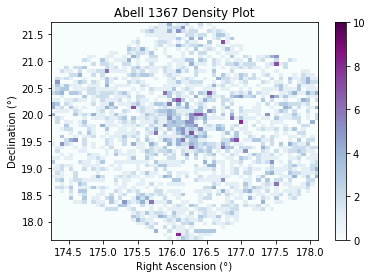

In [92]:
x = catalog['ALPHA_J2000']
y = catalog['DELTA_J2000']


plt.hist2d(x,y, bins = 60, vmax=10, cmap=plt.cm.BuPu)
plt.colorbar()
plt.title("Abell 1367 Density Plot")
plt.xlabel("Right Ascension (°)")
plt.ylabel("Declination (°)")

plt.show()

In [181]:
# libraries
#import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
 
#Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents

nbins=300
k = kde.gaussian_kde([x,y])
k.covariance_factor = lambda: 0.1
k._compute_covariance()
print(k)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
print(zi)

#plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
#plt.title("Abell 1367 Density Plot")
#plt.xlabel("Right Ascension (°)")
#plt.ylabel("Declination (°)")

#plt.scatter(x,y,c='white',marker=",",s=1)

#plt.show()
#plt.gcf().close()


[ 0.00012366  0.00020407  0.0003252  ...,  0.00565513  0.00398512
  0.00271736]


In [187]:
#fig = plt.figure()
 #ax = fig.add_subplot(111)
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape),vmax=0.30)
#plt.title("Abell 1367 Density Plot")
#plt.xlabel("Right Ascension (°)")
#plt.ylabel("Declination (°)")
#plt.colorbar()

#plt.scatter(x,y,c='white',marker=",",s=1, alpha=0.3)
#plt.gcf().set_size_inches((11,8))
#plt.show()
#plt.savefig('abell1367_density_practice.png', bbox_inches = 'tight')
#plt.gcf().close()

In [97]:
#plt.savefig('abell1367_density_practice.png', bbox_inches = 'tight')
#plt.close()

In [100]:
ned_fn = "/sas2/reu2019sara/abell1367/abell1367_redshifts.vot"
ned = astropy.table.Table.read(ned_fn)
ned['ra'] = ned['main_col3']
ned['dec'] = ned['main_col4']

In [99]:
bright = catalog['SERSIC_MAG'] < 16

3095
[  5.41430111e-19   1.57411591e-18   4.49857854e-18 ...,   3.91970371e-17
   1.40505303e-17   4.93915001e-18]


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


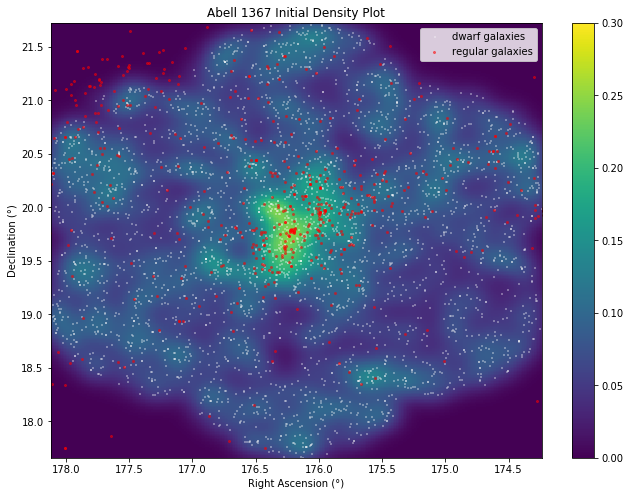

In [186]:
#plot density of dwarf objects > 15 with white as dwarfs and red as large objects 


ned_fn = "/sas2/reu2019sara/abell1367/abell1367_redshifts.vot"
ned = astropy.table.Table.read(ned_fn)
ned['ra'] = ned['main_col3']
ned['dec'] = ned['main_col4']

i_want = (fullcatalog['SKY_SKY'] < 0.2) & (fullcatalog['SERSIC_RE'] > 15)
print(np.sum(i_want))
catalog = fullcatalog[i_want]

x = catalog['ALPHA_J2000']
y = catalog['DELTA_J2000']

import numpy as np
from scipy.stats import kde
 
 
#Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents

nbins=300
k = kde.gaussian_kde([x,y])
k.covariance_factor = lambda: 0.1
k._compute_covariance()
print(k)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
print(zi)

fig = plt.figure()
ax = fig.add_subplot(111)
_x = ax.pcolormesh(xi, yi, zi.reshape(xi.shape),vmax=0.30)
ax.set_title("Abell 1367 Initial Density Plot")
ax.set_xlabel("Right Ascension (°)")
ax.set_ylabel("Declination (°)")
ax.set_xlim((np.max(x), np.min(x)))
ax.set_ylim((np.min(y), np.max(y)))

fig.colorbar(_x)

ax.scatter(x,y,c='white',marker=",",s=1, alpha=0.3, label='dwarf galaxies')
ax.scatter(ned['ra'], ned['dec'], marker="o", s=4, c='red', alpha=0.5, label='regular galaxies')
pylab.legend(loc='upper right')

fig.set_size_inches((11,8))
fig.show()
fig.savefig('abell1367_density_initial.png', bbox_inches = 'tight')



1168
[  7.67649179e-19   2.26878869e-18   6.57404597e-18 ...,   1.50924774e-17
   5.21661908e-18   1.76582075e-18]


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


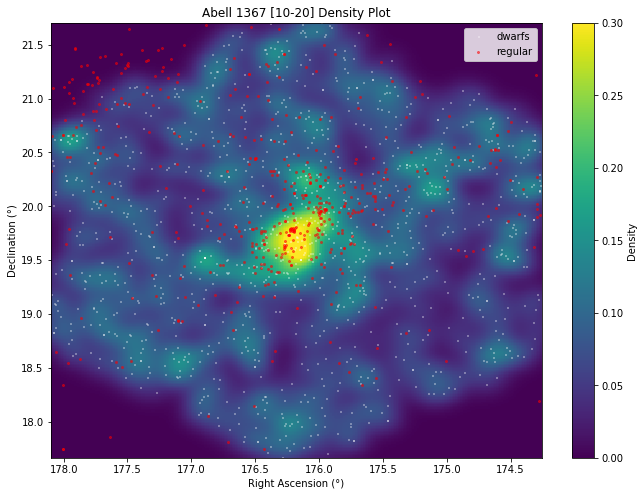

In [171]:
#plot density of dwarf objects between 10 and 20


i_want = (fullcatalog['SERSIC_RE'] < 20 ) & (fullcatalog['SKY_SKY'] < 0.2) & (fullcatalog['SERSIC_RE'] > 10)
print(np.sum(i_want))
catalog = fullcatalog[i_want]

x = catalog['ALPHA_J2000']
y = catalog['DELTA_J2000']

nbins=300
k = kde.gaussian_kde([x,y])
k.covariance_factor = lambda: 0.1
k._compute_covariance()
print(k)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
print(zi)

fig = plt.figure()
ax = fig.add_subplot(111)
_x = ax.pcolormesh(xi, yi, zi.reshape(xi.shape),vmax=0.30)
ax.set_title("Abell 1367 [10-20] Density Plot")
ax.set_xlabel("Right Ascension (°)")
ax.set_ylabel("Declination (°)")
ax.set_xlim((np.max(x), np.min(x)))
ax.set_ylim((np.min(y), np.max(y)))

nnn = fig.colorbar(_x)
nnn.set_label("Density")


ax.scatter(x,y,c='white',marker=",",s=1, alpha=0.3, label='dwarfs')
ax.scatter(ned['ra'], ned['dec'], marker="o", s=4, c='red', alpha=0.5, label='regular')
pylab.legend(loc='upper right')

fig.set_size_inches((11,8))
fig.show()
fig.savefig('abell1367_density_10_20.png', bbox_inches = 'tight')

831
[  7.86337484e-18   2.41112399e-17   7.25157858e-17 ...,   3.07962088e-15
   1.24742726e-15   4.95447548e-16]


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


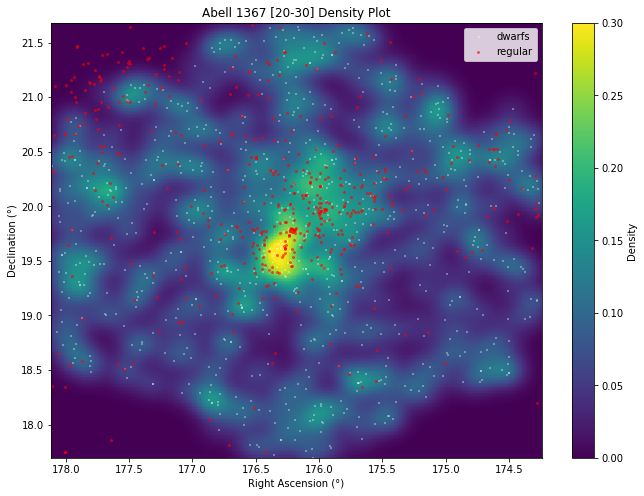

In [172]:
#Plot object density of dwarfs between 30 and 20

i_want = (fullcatalog['SERSIC_RE'] < 30) & (fullcatalog['SKY_SKY'] < 0.2) & (fullcatalog['SERSIC_RE'] > 20)
print(np.sum(i_want))
catalog = fullcatalog[i_want]

x = catalog['ALPHA_J2000']
y = catalog['DELTA_J2000']

nbins=300
k = kde.gaussian_kde([x,y])
k.covariance_factor = lambda: 0.1
k._compute_covariance()
print(k)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
print(zi)

fig = plt.figure()
ax = fig.add_subplot(111)
_x = ax.pcolormesh(xi, yi, zi.reshape(xi.shape),vmax=0.30)

ax.set_title("Abell 1367 [20-30] Density Plot")
ax.set_xlabel("Right Ascension (°)")
ax.set_ylabel("Declination (°)")
ax.set_xlim((np.max(x), np.min(x)))
ax.set_ylim((np.min(y), np.max(y)))

nnn = fig.colorbar(_x)
nnn.set_label("Density")


ax.scatter(x,y,c='white',marker=",",s=1, alpha=0.3, label='dwarfs')
ax.scatter(ned['ra'], ned['dec'], marker="o", s=4, c='red', alpha=0.5, label = 'regular')
pylab.legend(loc='upper right')

fig.set_size_inches((11,8))
fig.show()
fig.savefig('abell1367_density_20_30.png', bbox_inches = 'tight')

231
[  1.95858232e-21   5.61695328e-21   1.60855361e-20 ...,   1.31718352e-20
   4.83089424e-21   1.75030479e-21]


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


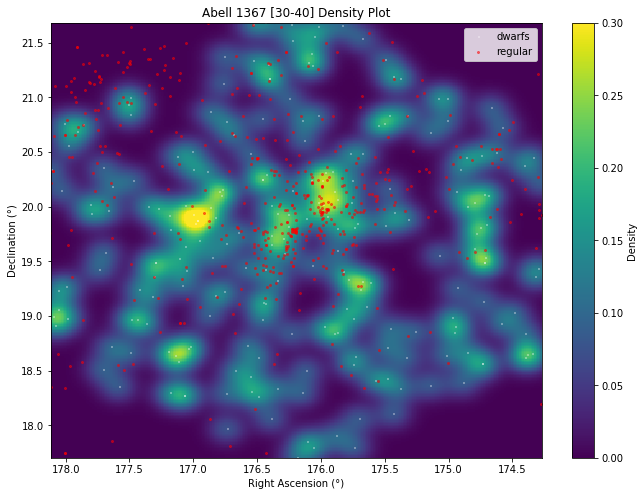

In [173]:
#Plot SERSIC_RE 30-40 dwarf density

i_want = (fullcatalog['SERSIC_RE'] < 40) & (fullcatalog['SKY_SKY'] < 0.2) & (fullcatalog['SERSIC_RE'] > 30)
print(np.sum(i_want))
catalog = fullcatalog[i_want]

x = catalog['ALPHA_J2000']
y = catalog['DELTA_J2000']

nbins=300
k = kde.gaussian_kde([x,y])
k.covariance_factor = lambda: 0.1
k._compute_covariance()
print(k)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
print(zi)

fig = plt.figure()
ax = fig.add_subplot(111)
_x = ax.pcolormesh(xi, yi, zi.reshape(xi.shape),vmax=0.30)

ax.set_title("Abell 1367 [30-40] Density Plot")
ax.set_xlabel("Right Ascension (°)")
ax.set_ylabel("Declination (°)")
ax.set_xlim((np.max(x), np.min(x)))
ax.set_ylim((np.min(y), np.max(y)))

nnn = fig.colorbar(_x)
nnn.set_label("Density")


ax.scatter(x,y,c='white',marker=",",s=1, alpha=0.3, label='dwarfs')
ax.scatter(ned['ra'], ned['dec'], marker="o", s=4, c='red', alpha=0.5, label='regular')
pylab.legend(loc='upper right')

fig.set_size_inches((11,8))
fig.show()
fig.savefig('abell1367_density_30_40.png', bbox_inches = 'tight')

3095


[ 0.00012366  0.00020407  0.0003252  ...,  0.00565513  0.00398512
  0.00271736]


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


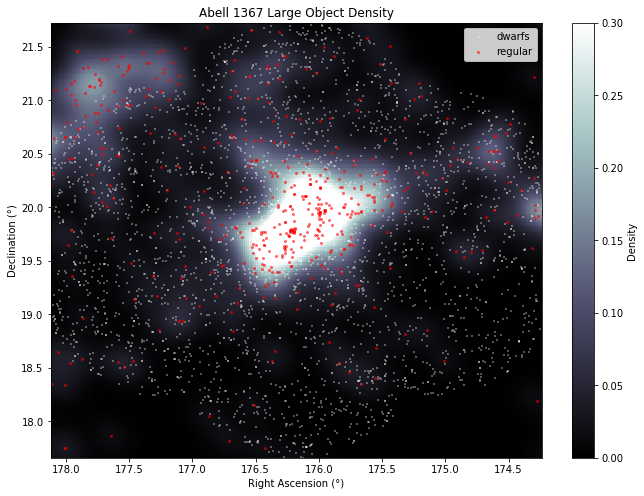

In [175]:
#Big Boy Graph--density of 'redshifts.vot' of the larger galaxies in field of view

i_want = (fullcatalog['SKY_SKY'] < 0.2) & (fullcatalog['SERSIC_RE'] > 15)
print(np.sum(i_want))
catalog = fullcatalog[i_want]

ned_fn = "/sas2/reu2019sara/abell1367/abell1367_redshifts.vot"
ned = astropy.table.Table.read(ned_fn)
ned['ra'] = ned['main_col3']
ned['dec'] = ned['main_col4']

x = ned['ra'] 
y = ned['dec']

q = catalog['ALPHA_J2000']
f = catalog['DELTA_J2000']

nbins=300
k = (kde.gaussian_kde([x,y])) #/ kde.gaussian_kde([ned['ra'],ned['dec'])
k.covariance_factor = lambda: 0.1
k._compute_covariance()
print(k)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
print(zi)


fig = plt.figure()
ax = fig.add_subplot(111)
_x = ax.pcolormesh(xi, yi, zi.reshape(xi.shape),vmax=0.30,cmap=plt.cm.bone) #should I keep the same scale for both?

ax.set_title("Abell 1367 Large Object Density")
ax.set_xlabel("Right Ascension (°)")
ax.set_ylabel("Declination (°)")
ax.set_xlim((np.max(q), np.min(q)))
ax.set_ylim((np.min(f), np.max(f)))

nnn = fig.colorbar(_x)
nnn.set_label("Density")


ax.scatter(q,f,c='white',marker=",",s=1, alpha=0.3, label='dwarfs')
ax.scatter(ned['ra'], ned['dec'], marker="o", s=4, c='red', alpha=0.5, label='regular')
pylab.legend(loc='upper right')

fig.set_size_inches((11,8))
fig.show()
fig.savefig('abell1367_density_large.png', bbox_inches = 'tight')

3095


 ALPHA_J2000  
--------------
 2.14596042956
 2.03494570758
 2.11774533081
 2.09933104702
 2.09935899387
 2.10412059689
 2.09393973961
 2.06443363557
 2.01335835119
 2.03238984577
           ...
 0.69823304837
 1.59803475738
 1.69433251273
 1.17515904357
 1.05781650119
 1.12425570503
 1.12167899799
0.989349078519
 1.05534007144
 1.06038276323
 1.00886342042
Length = 3095 rows
ZI: (10000,)


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


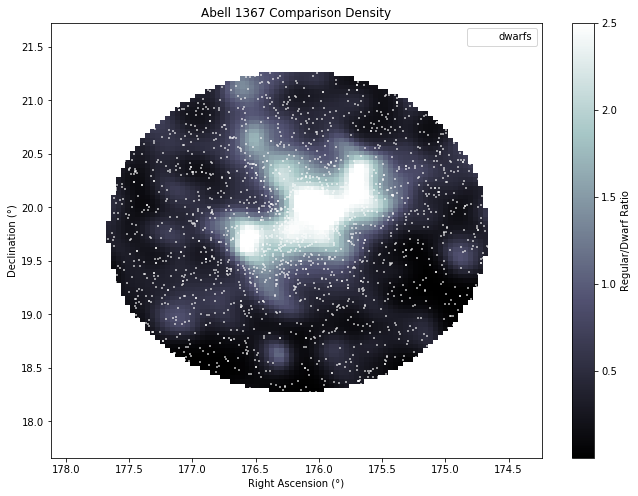

In [301]:
#comparison graph attempt 1--regular/dwarf ratio, numbers > 1 mean more regulars than dwarfs


i_want = (fullcatalog['SKY_SKY'] < 0.2) & (fullcatalog['SERSIC_RE'] > 15)
print(np.sum(i_want))
catalog = fullcatalog[i_want]

ned_fn = "/sas2/reu2019sara/abell1367/abell1367_redshifts.vot"
ned = astropy.table.Table.read(ned_fn)
ned['ra'] = ned['main_col3']
ned['dec'] = ned['main_col4']


x = ned['ra'] 
y = ned['dec']

q = catalog['ALPHA_J2000']
f = catalog['DELTA_J2000']


#making radius to limit Large scatter

abell_ra = 176.152
abell_dec = 19.76
radius = np.hypot( (q-abell_ra), (f-abell_dec))
print(radius)
near_center = (radius < 1.5)

#gaussian stuff for our big objects data

nbins=100

#gaussian stuff for our dwarf catalog >15 data

c = (kde.gaussian_kde([q,f])) 
c.covariance_factor = lambda: 0.1
c._compute_covariance()
#print(c)
qi, fi = np.mgrid[q.min():q.max():nbins*1j, f.min():f.max():nbins*1j]
ni = c(np.vstack([qi.flatten(), fi.flatten()]))
#print(ni)
astropy.io.fits.PrimaryHDU(data=ni.reshape(qi.shape)).writeto("densitymap_dwarfs.fits", overwrite=True)


# make sure we use the same coordinates for the big galaxies that we used for the dwarfs
k = (kde.gaussian_kde([x,y])) 
k.covariance_factor = lambda: 0.1
k._compute_covariance()
print(k)
#xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
#print(xi.shape)
zi = k(np.vstack([qi.flatten(), fi.flatten()]))
print("ZI:", zi.shape)
astropy.io.fits.PrimaryHDU(data=zi.reshape(qi.shape)).writeto("densitymap_giants.fits", overwrite=True)


kde_radius = np.hypot( (qi-abell_ra), (fi-abell_dec) )
kde_near_center = (kde_radius < 1.5)

fig = plt.figure()
ax = fig.add_subplot(111)

ratio_map = (zi/ni).reshape(qi.shape)
ratio_map[~kde_near_center] = 2.5
_x = ax.pcolormesh(qi, fi, ratio_map.reshape(qi.shape), vmax=2.5,cmap=plt.cm.bone)


ax.set_title("Abell 1367 Comparison Density")
ax.set_xlabel("Right Ascension (°)")
ax.set_ylabel("Declination (°)")
ax.set_xlim((np.max(q), np.min(q)))
ax.set_ylim((np.min(f), np.max(f)))

nnn = fig.colorbar(_x)
nnn.set_label("Regular/Dwarf Ratio")


ax.scatter(q,f,c='white',marker=",",s=1, alpha=0.3, label='dwarfs')
#ax.scatter(q[near_center],f[near_center],c='white',marker=",",s=1, alpha=0.3, label='dwarfs')

#ax.scatter(ned2['ra'], ned2['dec'], marker="o", s=4, c='red', alpha=0.5, label='regular')
pylab.legend(loc='upper right')

fig.set_size_inches((11,8))
fig.show()
ax.scatter(q,f,c='white',marker=",",s=1, alpha=0.3, label='dwarfs')

fig.savefig('abell1367_density_compare.png', bbox_inches = 'tight')

/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


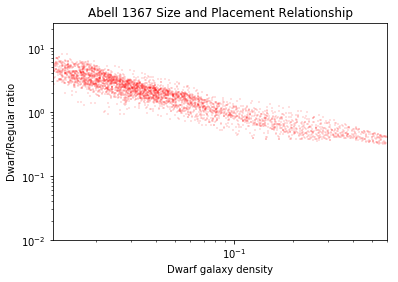

In [318]:
#Plot of above regular/dwarf ratio as a function of dwarf density

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(zi[kde_near_center.flatten()], (ni/zi)[kde_near_center.flatten()], c='red',marker=",",s=1,alpha=0.1)

#plt.plot([10, -10], [10, -10], 'k-', color='b')

ax.set_ylim((.01,25))
ax.set_xlim((0.012,0.6))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Dwarf galaxy density")
ax.set_ylabel("Dwarf/Regular ratio")
ax.set_title("Abell 1367 Size and Placement Relationship")

#fig.savefig('abell1367_density_scatter.png', bbox_inches = 'tight')

fig.show()

/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


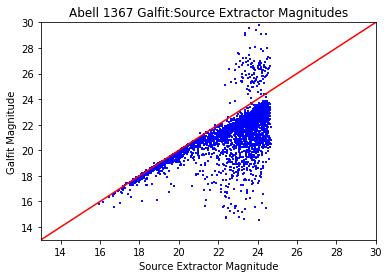

In [303]:
#galfit magnitude-- galfit as a function of source extractor comparison plot 


fig = plt.figure()
ax = fig.add_subplot(111)

x = catalog['MAG_AUTO']
y = catalog['SERSIC_MAG']

plt.plot([0, 30], [0, 30], 'k-', color='r')

ax.scatter(x, y, c='blue', marker=",", s=1,)
ax.set_ylim(13,30)
ax.set_xlim(13,30)
ax.set_xlabel("Source Extractor Magnitude")
ax.set_ylabel('Galfit Magnitude')

ax.set_title("Abell 1367 Galfit:Source Extractor Magnitudes")

fig.show()
fig.savefig('abell1367_magnitude_scatter.png', bbox_inches = 'tight')


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


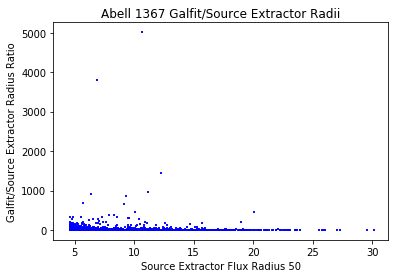

In [316]:
#galfit radius divided by SE radius as a function of SE radius comparison plot 


fig = plt.figure()
ax = fig.add_subplot(111)

x = catalog['FLUX_RADIUS_50']
y = (catalog['SERSIC_RE'])/ x

#plt.plot([0, 30], [0, 30], 'k-', color='r')

ax.scatter(x, y, c='blue', marker=",", s=1,)
#ax.set_ylim(13,30)
#ax.set_xlim(13,30)
ax.set_xlabel("Source Extractor Flux Radius 50")
ax.set_ylabel('Galfit/Source Extractor Radius Ratio')

ax.set_title("Abell 1367 Galfit/Source Extractor Radii")

fig.show()
fig.savefig('abell1367_radius_scatter.png', bbox_inches = 'tight')


/opt/intel/intelpython3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


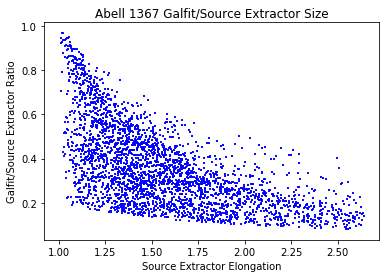

In [317]:
#galfit elongation divided by SE elongation as a function of SE elongation plot


fig = plt.figure()
ax = fig.add_subplot(111)

x = catalog['ELONGATION']
y = (catalog['SERSIC_AR'])/ x

#plt.plot([0, 30], [0, 30], 'k-', color='r')

ax.scatter(x, y, c='blue', marker=",", s=1,)
#ax.set_ylim(13,30)
#ax.set_xlim(13,30)
ax.set_xlabel("Source Extractor Elongation")
ax.set_ylabel('Galfit/Source Extractor Ratio')

ax.set_title("Abell 1367 Galfit/Source Extractor Size")

fig.show()
fig.savefig('abell1367_elongation_scatter.png', bbox_inches = 'tight')

